## **Matching Algorithm Demonstration**

This notebook demonstrates how the matching algorithm is conducted. Note for demonstration purposes we will use dummy data. This dummy data is based off survey results from a previous career symposium. To maintain privacy, names were generated randomly using the python [names](https://pypi.org/project/names/) package. 

In [105]:
import pandas as pd
import numpy as np
from matching import Matching, Preferences, FinalPairing
import matplotlib.pyplot as plt

In [2]:
print(pd.__version__)
print(np.__version__)

2.0.1
1.24.3


In [3]:
%load_ext autoreload 
%autoreload 2

This matching algoirthm takes into consideration matching students with their top prefrences, pioritizing students and also distributing students across the roundtables as best as possible. 

To evaluate this algorithm we ensured that each student has at least 1 of their top prefrences. If not than students can be matched manually. 

In [7]:
preferences = Preferences(pd.read_csv("DummyData.csv"))

Each student is a row and their preferences and identifiers consist of the columns. First we will convert the preference to numeric values.
- Strongest interest - 1
- Strong interest - 2
- Interested - 3

#### **Round Table #1**

In [205]:
match1 = Matching(preferences, max_per_group=5, hard_max_per_group=10, rank_1_pts=10, rank_2_pts=5, rank_3_pts=1)

In [206]:
match1.getAlgorithmDescription()

Part A: Determine Mentor Popularity
	1. Rank mentors based on their popularity based on how many students ranked them and how strongly students ranked them criteria:
		For each Student that has Strongest Interest award 10
		For each Student that has Strong Interest award 5
		For each Student that has Interested award 1
Part B: Pair each student with a mentorship group
	1. Sort students based on their priority students graduating soon have priority over lower year students
	2. For Each Student: (From highest to lowest priority)
		2.1 Sort preferences by rank (highest to lowest) and mentor popularity (lowest to highest)
		2.2 Try to pair the student with their least popular highest ranked mentor. Pairing is successful if there are 5 or less students in the mentor's group
		2.3 If pairing is unsucessful, go down the students list of mentors untill we are successful
		2.4 If pairing is unsucessful repeat steps 2.1-2.3 with less stringent threshold of 10


In [207]:
match1.match()

In [213]:
a = match1.getStudentPreferencesMatches()

In [215]:
a[a['RANK'] >= 3]

,MENTOR,Email,RANK
60,Mentor_O,bradley.curtis@domain.com,3.0


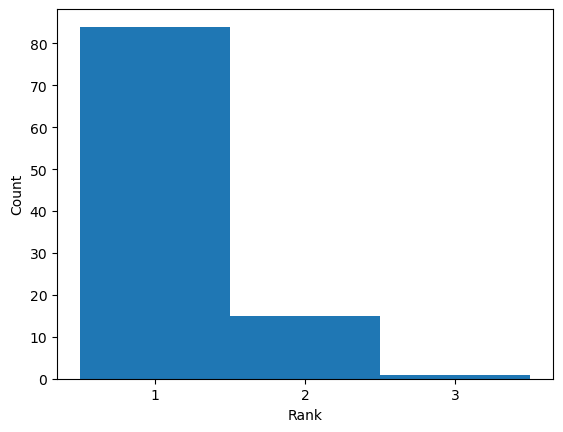

In [211]:
match1.plotStudentPreferences()

Based on the current algorithm seems that most people are matched with their top, however not everyone is.

<Axes: xlabel='GROUP_SIZE', ylabel='MENTOR_POPULARITY'>

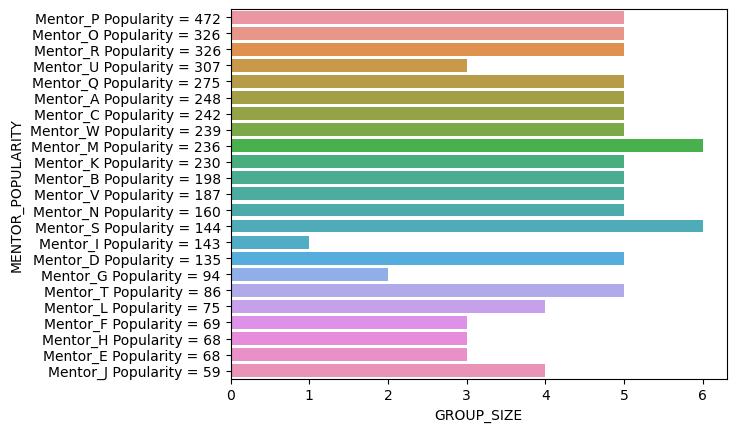

In [212]:
match1.plotMentorPopularityGroupSize()

Strangely the least popular mentor has a lot of people  

In [217]:
match1.checkMatches()

==========STARTING TEST checkGreaterThanMin() ==========
In total 1/23 groups were less than min of 2
==========STARTING TEST checkLessThanMax() ==========
In total 2/23 groups were greater than max of 5
==========STARTING TEST checkMentorGroupsSound() ==========
==========STARTING TEST checkMenteesSound() ==========


In [218]:
match1.checkProportionPreference()

Out of 100 mentees
84 (84%) were matched with their strongest interest
15 (15%) were matched with their strong interest
1 (1%) were matched with their interested
1 (1%) mentees did not have a strongest interest preference
1 (1%) mentees only had an interested preference


#### **Match 2**

In [221]:
preferences2 = match1.filterMatchesFromPreference()

Metadata set, assuming dataframe is already formatted


In [222]:
match2 = Matching(preferences2)
match2.match()
match2.checkMatches()

==========STARTING TEST checkGreaterThanMin() ==========
In total 0/23 groups were less than min of 2
==========STARTING TEST checkLessThanMax() ==========
In total 20/23 groups were greater than max of 2
==========STARTING TEST checkMentorGroupsSound() ==========
==========STARTING TEST checkMenteesSound() ==========


In [223]:
match2.checkProportionPreference()

Out of 100 mentees
56 (56%) were matched with their strongest interest
33 (33%) were matched with their strong interest
11 (11%) were matched with their interested
11 (11%) mentees did not have a strongest interest preference
11 (11%) mentees only had an interested preference


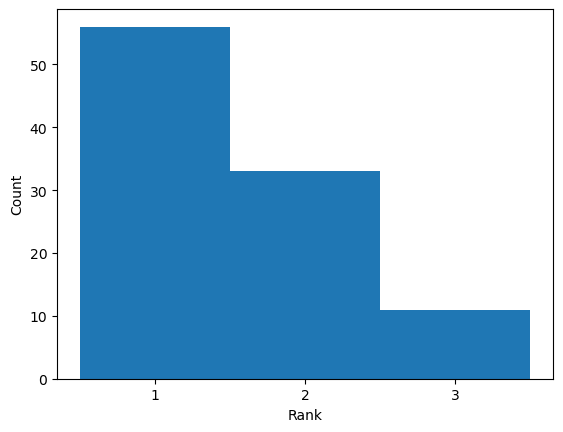

In [224]:
match2.plotStudentPreferences()

Based on the current algorithm seems that most people are matched with their top, however not everyone is.

<Axes: xlabel='GROUP_SIZE', ylabel='MENTOR_POPULARITY'>

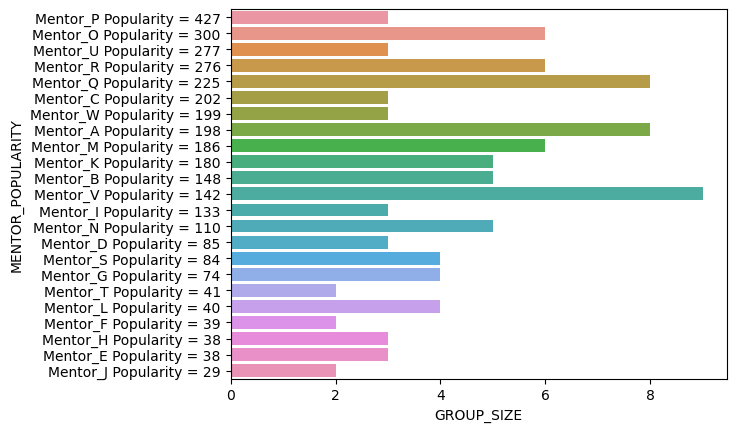

In [233]:
match2.plotMentorPopularityGroupSize()

#### **Match 3**

In [230]:
preferences3 = match2.filterMatchesFromPreference()

Metadata set, assuming dataframe is already formatted


In [231]:
match3 = Matching(preferences3, max_per_group=5, hard_max_per_group=10)
match3.match()
match3.checkMatches()

==========STARTING TEST checkGreaterThanMin() ==========
In total 5/23 groups were less than min of 2
==========STARTING TEST checkLessThanMax() ==========
In total 8/23 groups were greater than max of 5
==========STARTING TEST checkMentorGroupsSound() ==========
==========STARTING TEST checkMenteesSound() ==========


In [232]:
match3.checkProportionPreference()

Out of 100 mentees
43 (43%) were matched with their strongest interest
42 (42%) were matched with their strong interest
15 (15%) were matched with their interested
15 (15%) mentees did not have a strongest interest preference
15 (15%) mentees only had an interested preference


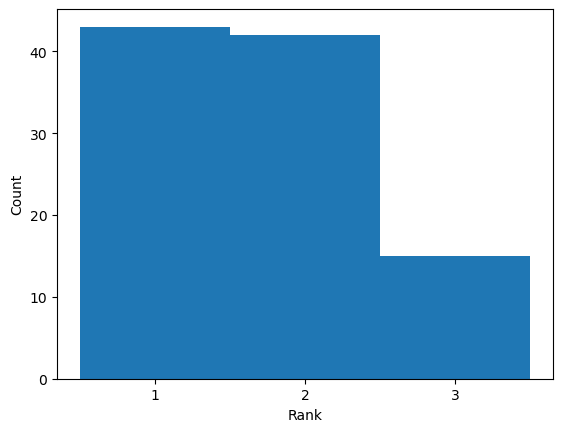

In [234]:
match3.plotStudentPreferences()

Based on the current algorithm seems that most people are matched with their top, however not everyone is.

<Axes: xlabel='GROUP_SIZE', ylabel='MENTOR_POPULARITY'>

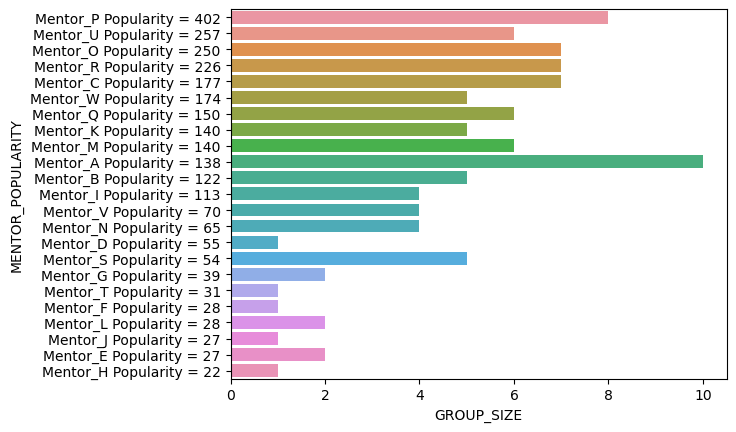

In [235]:
match3.plotMentorPopularityGroupSize()

Seems like the matching is too good to begin with and therefore we have more imbalances 

---

In [ ]:
prefer

In [286]:
final_pairings = FinalPairing([match1, match2, match3], preferences)

In [252]:
match1.getStudentPreferencesMatches()

,MENTOR,Email,RANK
0,Mentor_A,stanley.flores@domain.com,1.0
1,Mentor_A,earl.rouse@domain.com,1.0
2,Mentor_A,yvonne.balderas@domain.com,1.0
3,Mentor_A,james.nelson@domain.com,1.0
4,Mentor_A,heather.martin@domain.com,1.0
...,...,...,...
95,Mentor_W,russell.pope@domain.com,2.0
96,Mentor_W,alan.sikora@domain.com,1.0
97,Mentor_W,william.jump@domain.com,1.0
98,Mentor_W,joe.pinard@domain.com,1.0


In [301]:
proportionTop = final_pairings.checkProportionTop()

Out of 100 mentees
91 (91%) were matched with at least 1 of their strongest interest
8 (8%) were matched with at least 1 of their strong interest (no strongest interest)
1 (1%) were not matched with any of their strongest/strong interest
8 (8%) students did not have a strongest interest
1 (1%) students did not have a strongest or strong interest


Everyone got at least 1 of their top rank who ranked a top!